# Data Science Intern - Summer 2022

----
### Candidate Name : SHIRSENDU KONER
----

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the dataset
dataset = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
# Viewing the dataset
dataset.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [4]:
# viewing the shape of the dataset
dataset.shape

(5000, 7)

In [5]:
# viewing the columns of the dataset
dataset.columns

Index(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'],
      dtype='object')

In [6]:
# info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


### We have no null values in our dataset.

In [7]:
# applying describe in the dataset
dataset.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


## Here as per question AOV(Average Order Value) is $3145.13. And we need to find where the mistake is.


#### For Information: <i>AOV = (Total Revenue / Total Number of orders)
    Let do our own calculation and see if the AOV is really $3145.13 or not.

In [8]:
# Calculation of AOV
total_revenue = dataset['order_amount'].sum()
total_orders = dataset['total_items'].sum()
aov = total_revenue / total_orders
print('So the AOV as per our general calculation is : ${0:.2f}.'.format(aov))

So the AOV as per our general calculation is : $357.92.


## AOV as per question is \\$3145.13 and as per general calculation it is \\$357.92. The reason for such a difference is : 
- while calculating AOV value, for total orders instead of taking actual total number of orders, the total count of rows under the total_orders columns must have been taken i.e, 
        - aov = total_revenue / dataset['order_amount'].count(), which will give us $3145.92 instead of $357.92

In [9]:
# finding Standard Deviation for our calculated AOV = $357.92
def variance(data):
    n = dataset['total_items'].sum()
    mean = sum(data) / n
    print('AOV calculated is ${0:.2f}'.format(mean))
    deviations = [(x - mean) ** 2 for x in data]
    variance = sum(deviations) / n
    return variance
 
def standard_deviation(data):
    import math
    var = variance(data)
    std_dev = math.sqrt(var)
    return std_dev
print('Standard Deviation calcuated is {0:.2f}'.format(standard_deviation(dataset['order_amount'])))

AOV calculated is $357.92
Standard Deviation calcuated is 13956.79


# However the AOV value of \\$357.92 is still not accurate.Why?
- ### Because :
    - if we analyse the descibe function results then we will see that there are a lot of discrepancies in the data that have increased the said AOV.
    - the minimum value is \\$90 and the maximum value is \\$704000. The difference between the maximum and minimum values is huge for a sneaker selling shop.Some shops have sold only 1 whereas some have sold a lot such that the contribution from those shops alone is incredibly high and has affected the calculation of AOV value.
    - the median value of \\$284 supports our above statement.
    - the huge difference between (minimum and maximum) and (median and maximum) value shows that the there are some outliers in our data that is affecting our calculation.<br><br>
    - the <b>Standard deviation</b> in the initial calculation is <b>41282.54</b> which is very large and signifies that on average , the values vary by 41,282.54 from the mean. This indicates that taking the mean for AOV as per the question is not correct.
    - Our <b>calculated Standard Deviation</b> for a mean value of \\$357.92 is <b>13956.79</b> which is still a large value. This indicates that on average the values deviate by 13956.79 from the mean or AOV.
## So our AOV of \\$357.92 is not accurrate and we need to consider some other methods that will eliminate the outliers.

- A better way to evaluate this dataset will be by using a method that is more robust to outliers, such as using the _**modal**_ value as AOV or the _**median of the dataset**_ or the _**median of the Interquartile Range**_ of the dataset (middle 50%).
- ## Here I will consider the Interquartile range of the dataset to calculate the AOV.
    This is because by considering this Interquartile range I will be able to avoid the outliers as this will drop the very high and very low values from being considered for calculation. Only those values that make up the middle 50% of the dataset will be taken under consideration.

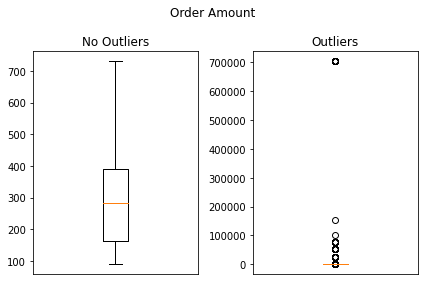

In [10]:
# using box plot to show the OUTLIERS
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(dataset['order_amount'], showfliers=False)
ax[0].set_title("No Outliers")
ax[0].get_xaxis().set_visible(False)
ax[1].boxplot(dataset['order_amount'], showfliers=True)
ax[1].set_title("Outliers")
ax[1].get_xaxis().set_visible(False)
plt.suptitle('Order Amount')
fig.tight_layout()
plt.show()

In [11]:
# finding the quartile ranges
Q1 = np.quantile(dataset['order_amount'], 0.25)
Q2 = np.quantile(dataset['order_amount'], 0.50)
Q3 = np.quantile(dataset['order_amount'], 0.75)
print('First Quartile Value of the dataset is : ${0:.2f}'.format(Q1))
print('Second Quartile Value of the dataset is : ${0:.2f}'.format(Q2))
print('Third Quartile Value of the dataset is : ${0:.2f}'.format(Q3))

First Quartile Value of the dataset is : $163.00
Second Quartile Value of the dataset is : $284.00
Third Quartile Value of the dataset is : $390.00


In [12]:
# calculating the inter quartile range(IQR)
IQR = Q3 - Q1
print('The Interquartile Range value of our dataset is of ${0:.2f}'.format(IQR))

The Interquartile Range value of our dataset is of $227.00


In [13]:
# removing the outliers
lower_range = Q1 - 1.5*IQR # lowest range for new dataset
upper_range = Q2 + 1.5*IQR # highest range for new dataset

# observations that lie outside the lower_range and upper_range IQR region are removed
df = dataset[(dataset['order_amount'] > lower_range) & (dataset['order_amount'] < upper_range)]

### In our dataset we saw that there are many who have palced multiple orders multiple times, so we can't take the mean or meadian value as AOV directly

In [14]:
# applying describe method on the dataset
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4738.000000,4738.000000,4738.000000,4738.000000,4738.00000
mean,2500.866399,49.770367,850.325876,283.814268,1.89848
std,1444.266056,29.149727,86.802461,132.061996,0.86278
min,1.000000,1.000000,700.000000,90.000000,1.00000
25%,1247.250000,24.000000,776.000000,161.000000,1.00000
50%,2502.500000,50.000000,851.000000,272.000000,2.00000
75%,3755.750000,74.000000,926.000000,362.000000,2.00000
max,5000.000000,100.000000,999.000000,624.000000,5.00000


### Getting the AOV(Average Order Value)

#### We know that the **Average Order Value (AOV)** is calculated by dividing the ***total revenue*** by the ***number of orders placed***.
        
- AOV = Total Revenue / Total Orders Placed
        


In [15]:
# printing the AOV
df_total_revenue = df['order_amount'].sum()
df_total_order_placed = df['total_items'].sum()

actual_AOV = df_total_revenue / df_total_order_placed
print('\033[1mThe actual Average Order Value\033[1m or \033[1mAOV\033[1m is : \033[1m$', round(actual_AOV, 2))

The actual Average Order Value or AOV is : $ 149.5


# ------------------------------------------------------------------------------------------------------------

# Answers to the Questioned asked :

----

# 1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

<b>=>> While calculating AOV value, for total orders instead of taking actual total number of orders, the total count of rows under the total_orders columns must have been taken i.e,
  - aov = total_revenue / dataset['order_amount'].count(), which will give us $3145.92.
  
=>> If we analyse the descibe function results then we will see that there are a lot of discrepancies in the data that have increased the said AOV.

<b>=>> The minimum value is \\$90 and the maximum value is $704000. The difference between the maximum and minimum values is huge for a sneaker selling shop. Some shops have sold only 1 whereas some have sold a lot such that the contribution from those shops alone is incredibly high and has affected the calculation of AOV value.

=>> The median value of $284 supports our above statement.

=>> The huge difference between (minimum and maximum) and (median and maximum) value shows that the there are some outliers in our data that is affecting our calculation.

<b>=>> The Standard deviation in the initial calculation is 41282.54 which is very large and signifies that on average , the values vary by 41,282.54 from the mean. This indicates that taking the mean for AOV as per the question is not correct.

=>> Our generally calculated Standard Deviation for a mean value of $357.92 is 13956.79 which is still a large value. This indicates that on average the values deviate by 13956.79 from the mean or AOV.

=>> So our AOV of $357.92 is also not accurrate and we need to consider some other methods that will eliminate the outliers.


<b>=>> A better way to evaluate this dataset will be by using a method that is more robust to outliers, such as using the modal value as AOV or the median of the dataset or the median of the Interquartile Range of the dataset (middle 50%). However as there are multiple orders of the same item palced by some buyers we will use mean but of the Interquartile Range dataset.

-----

# 2. What metric would you report for this dataset?

<b>=>> Here I will consider the Interquartile range of the dataset to calculate the AOV. This is because by considering this Interquartile range I will be able to avoid the outliers as this will drop the very high and very low values from being considered for calculation. Only those values that make up the middle 50% of the dataset will be taken under consideration.

<b>=>> And finally I will calculate the AOV based on the new Interquartile Range dataset by the fomula metioned above i.e.</b>
 - AOV = Total Revenue / Total Orders Placed

----

# 3. What is its value?

<b>=>> The new calculated _Average Order Value (AOV)_ is $149.5 
